# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Dataset

In [2]:
# Import dataset
transaction = pd.read_csv('/content/drive/MyDrive/IYKRA/#8 Create Targeted Campaign with RFM and Promotion Recommendation/Practice Case/Transactions.csv')
customer = pd.read_csv('/content/drive/MyDrive/IYKRA/#8 Create Targeted Campaign with RFM and Promotion Recommendation/Practice Case/Customer.csv')
category_info = pd.read_csv('/content/drive/MyDrive/IYKRA/#8 Create Targeted Campaign with RFM and Promotion Recommendation/Practice Case/prod_cat_info.csv')

In [3]:
# Show transaction table
transaction.head(3)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [4]:
# Show customer table
customer.head(3)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0


In [5]:
# Show product category table
category_info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


# Data Preprocessing

In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    23053 non-null  int64  
 1   cust_id           23053 non-null  int64  
 2   tran_date         23053 non-null  object 
 3   prod_subcat_code  23053 non-null  int64  
 4   prod_cat_code     23053 non-null  int64  
 5   Qty               23053 non-null  int64  
 6   Rate              23053 non-null  int64  
 7   Tax               23053 non-null  float64
 8   total_amt         23053 non-null  float64
 9   Store_type        23053 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.8+ MB


In [7]:
# Merge transaction and customer data
df = pd.merge(transaction, customer, left_on='cust_id', right_on='customer_Id', how='left')
df.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0


In [8]:
# check number of rows and columns
df.shape

(23053, 14)

In [9]:
# Calculate descriptive statistics
df.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [10]:
# Drop customer_Id column from customer data
df.drop(['customer_Id'], axis=1, inplace=True)

In [11]:
# Convert tran_date and DOB columns data type to datetime
df['tran_date'] = pd.to_datetime(df['tran_date'])
df['DOB'] = pd.to_datetime(df['DOB'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23053 non-null  int64         
 1   cust_id           23053 non-null  int64         
 2   tran_date         23053 non-null  datetime64[ns]
 3   prod_subcat_code  23053 non-null  int64         
 4   prod_cat_code     23053 non-null  int64         
 5   Qty               23053 non-null  int64         
 6   Rate              23053 non-null  int64         
 7   Tax               23053 non-null  float64       
 8   total_amt         23053 non-null  float64       
 9   Store_type        23053 non-null  object        
 10  DOB               23053 non-null  datetime64[ns]
 11  Gender            23044 non-null  object        
 12  city_code         23045 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(6), object(2)
memory usage: 2.5+ MB


In [12]:
# Check number of null in data
df.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
dtype: int64

In [13]:
# Drop null data
df.dropna(inplace=True)

In [14]:
# Check transaction_id column unique values
df['transaction_id'].unique()

array([80712190438, 29258453508, 51750724947, ..., 89780862956,
       85115299378, 77960931771])

In [15]:
# Check cust_id column unique values
df['cust_id'].unique()

array([270351, 270384, 273420, ..., 269556, 274935, 273723])

In [16]:
# Check prod_subcat_code column unique values
df['prod_subcat_code'].unique()

array([ 1,  5,  6, 11,  8, 12,  3,  7,  4,  9, 10,  2])

In [17]:
# Check prod_cat_code column unique values
df['prod_cat_code'].unique()

array([1, 3, 5, 6, 2, 4])

In [18]:
# Check Store_type column unique values
df['Store_type'].unique()

array(['e-Shop', 'TeleShop', 'MBR', 'Flagship store'], dtype=object)

In [19]:
# Check Gender column unique values
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [20]:
# Check city_code column unique values
df['city_code'].unique()

array([ 5.,  8.,  3.,  6.,  9.,  1.,  2., 10.,  7.,  4.])

In [21]:
# Change Qty, Rate, and total_amt columns values to positive values
df['Qty'] = df['Qty'].abs()
df['Rate'] = df['Rate'].abs()
df['total_amt'] = df['total_amt'].abs()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23036 entries, 0 to 23052
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    23036 non-null  int64         
 1   cust_id           23036 non-null  int64         
 2   tran_date         23036 non-null  datetime64[ns]
 3   prod_subcat_code  23036 non-null  int64         
 4   prod_cat_code     23036 non-null  int64         
 5   Qty               23036 non-null  int64         
 6   Rate              23036 non-null  int64         
 7   Tax               23036 non-null  float64       
 8   total_amt         23036 non-null  float64       
 9   Store_type        23036 non-null  object        
 10  DOB               23036 non-null  datetime64[ns]
 11  Gender            23036 non-null  object        
 12  city_code         23036 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(6), object(2)
memory usage: 2.5+ MB


In [23]:
# Change the columns name to make it easier to remember
df.rename(columns=({'cust_id': 'customer_id', 'tran_date': 'transaction_date', 'prod_subcat_code': 'subcategory_code',
                   'prod_cat_code': 'category_code', 'Qty': 'quantity', 'Rate': 'rate', 'Tax': 'tax', 'total_amt': 'total_amount',
                   'Store_type': 'store_type', 'DOB': 'birth', 'Gender': 'gender'}), inplace=True)
df.head(2)

,transaction_id,customer_id,transaction_date,subcategory_code,category_code,quantity,rate,tax,total_amount,store_type,birth,gender,city_code
0,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,5,1497,785.925,8270.925,e-Shop,1973-11-05,F,8.0


#  RFM-AR Scoring




## Recency, Frequency, and Monetary (RFM) 

In [24]:
# Make a new variable (max_date) contain of maximum value of transaction_date column
max_date = df['transaction_date'].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [25]:
# Make a new variable (cust_agg) contain of aggregate function to get frequency (transaction_id) and monetary values (total_amount)
cust_agg = df.groupby('customer_id').agg({'transaction_date':'max','transaction_id':'count', 'total_amount':'sum'}).reset_index()
cust_agg.head()

,customer_id,transaction_date,transaction_id,total_amount
0,266783,2013-09-02,5,14791.530
1,266784,2012-09-09,3,5694.065
2,266785,2013-02-13,8,35271.600
3,266788,2013-12-02,4,6092.970
4,266794,2014-12-02,12,28253.745


In [26]:
# Make a new column (recency) contain of difference between max_date and each transaction_date values to get recency in months
cust_agg['recency'] = (max_date - cust_agg['transaction_date'])/np.timedelta64(1, 'M')
cust_agg.head(3)

,customer_id,transaction_date,transaction_id,total_amount,recency
0,266783,2013-09-02,5,14791.530,14.981827
1,266784,2012-09-09,3,5694.065,26.743876
2,266785,2013-02-13,8,35271.600,21.585659


In [27]:
# Calculate descriptive statistics of cust_agg variable
cust_agg.describe()

,customer_id,transaction_id,total_amount,recency
count,5502.000000,5502.000000,5502.000000,5502.000000
mean,271035.526536,4.186841,10957.700768,17.835526
std,2453.093450,2.116921,7170.678459,8.597923
min,266783.000000,1.000000,98.345000,0.000000
25%,268911.000000,3.000000,5571.133750,12.024888
50%,271026.500000,4.000000,9725.105000,15.737489
75%,273172.750000,6.000000,15192.645000,22.308466
max,275265.000000,13.000000,53772.615000,46.916774


In [28]:
# Change the columns name
cust_agg.rename({'transaction_id':'frequency','total_amount':'monetary'}, axis=1, inplace=True)
cust_agg.head(3)

,customer_id,transaction_date,frequency,monetary,recency
0,266783,2013-09-02,5,14791.530,14.981827
1,266784,2012-09-09,3,5694.065,26.743876
2,266785,2013-02-13,8,35271.600,21.585659


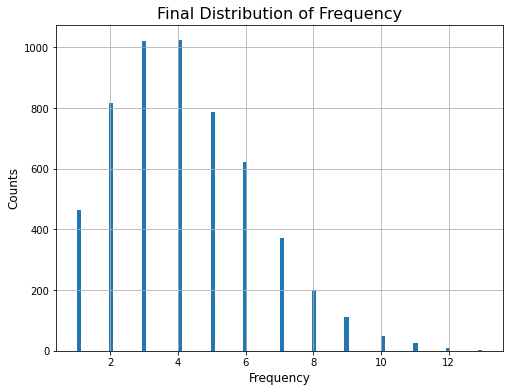

In [29]:
# Visualize the frequency histogram
fig, ax = plt.subplots(figsize=(8,6));
cust_agg['frequency'].hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Frequency", fontsize=16)
ax.set_xlabel("Frequency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

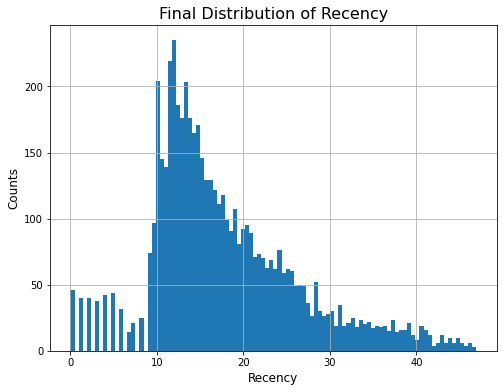

In [30]:
# Visualize the recency histogram
fig, ax = plt.subplots(figsize=(8,6));
cust_agg['recency'].hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Recency", fontsize=16)
ax.set_xlabel("Recency", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

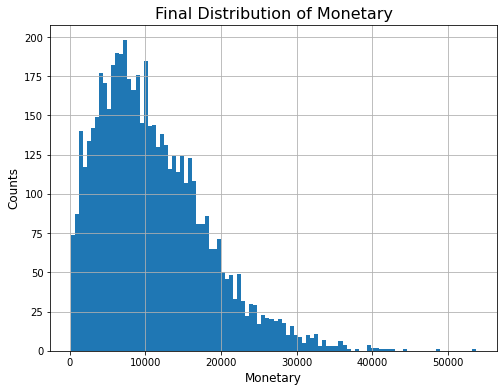

In [31]:
# Visualize the monetary histogram
fig, ax = plt.subplots(figsize=(8,6));
cust_agg['monetary'].hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Monetary", fontsize=16)
ax.set_xlabel("Monetary", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

## Age, and Return (AR) 

In [32]:
# Make a new variable contain of customer_id and minimum value of each transaction_date
cust_age = df.groupby('customer_id')['transaction_date'].min().reset_index()
# Make a new column (age) contain of difference between max_date and minimum value of each transaction_date
# to find out how long the customer be our customer in months
cust_age['age'] = (max_date - cust_age['transaction_date'])/np.timedelta64(1, 'M')
cust_age.head(2)

,customer_id,transaction_date,age
0,266783,2011-09-23,38.308795
1,266784,2012-04-12,31.672108


In [33]:
# Make a new variable contain of customer_id and transaction_date columns
cust_return = df[['customer_id','transaction_date']].drop_duplicates()
# Sorting the data based on customer_id and transaction_date columns
cust_return = cust_return.sort_values(by=['customer_id','transaction_date'],axis=0)
# To get the return value by calculating the distance of transactions made by each customer in days
cust_return = cust_return[['customer_id','transaction_date']].drop_duplicates().set_index('customer_id').diff().reset_index()
cust_return['nrow'] = cust_return.groupby('customer_id').cumcount()+1
cust_return.head(3)

,customer_id,transaction_date,nrow
0,266783,NaT,1
1,266783,1 days,2
2,266783,393 days,3


In [34]:
# Merge cust_age and cust_return data
cust_ar = pd.merge(cust_age, cust_return, on="customer_id")
cust_ar.columns =['customer_id','transaction_date', 'age','return','nrow']
cust_ar

,customer_id,transaction_date,age,return,nrow
0,266783,2011-09-23,38.308795,NaT,1
1,266783,2011-09-23,38.308795,1 days,2
2,266783,2011-09-23,38.308795,393 days,3
3,266783,2011-09-23,38.308795,122 days,4
4,266783,2011-09-23,38.308795,194 days,5
...,...,...,...,...,...
22979,275264,2011-05-08,42.842769,-297 days,1
22980,275264,2011-05-08,42.842769,94 days,2
22981,275265,2011-12-17,35.516130,129 days,1
22982,275265,2011-12-17,35.516130,9 days,2


In [35]:
# Change return column value from day to month
cust_ar['return'] = cust_ar['return']/np.timedelta64(1, 'M')
cust_ar

,customer_id,transaction_date,age,return,nrow
0,266783,2011-09-23,38.308795,NaN,1
1,266783,2011-09-23,38.308795,0.032855,2
2,266783,2011-09-23,38.308795,12.911969,3
3,266783,2011-09-23,38.308795,4.008296,4
4,266783,2011-09-23,38.308795,6.373848,5
...,...,...,...,...,...
22979,275264,2011-05-08,42.842769,-9.757901,1
22980,275264,2011-05-08,42.842769,3.088359,2
22981,275265,2011-12-17,35.516130,4.238280,1
22982,275265,2011-12-17,35.516130,0.295694,2


In [36]:
# Merge cust_agg and cust_ar data
cust_agg = pd.merge(cust_agg, cust_ar, on="customer_id", how="left")
cust_agg.isna().sum()

customer_id           0
transaction_date_x    0
frequency             0
monetary              0
recency               0
transaction_date_y    0
age                   0
return                1
nrow                  0
dtype: int64

In [37]:
cust_agg.rename({'transaction_date_x':'transaction_date_max','transaction_date_y':'transaction_date_min'}, axis=1, inplace=True)

In [38]:
# Remove first transaction except for the only one transaction or new customers
cust_agg = cust_agg[((cust_agg['nrow']!=1) & (cust_agg['frequency']>1))] 

In [39]:
cust_agg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17482 entries, 1 to 22983
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           17482 non-null  int64         
 1   transaction_date_max  17482 non-null  datetime64[ns]
 2   frequency             17482 non-null  int64         
 3   monetary              17482 non-null  float64       
 4   recency               17482 non-null  float64       
 5   transaction_date_min  17482 non-null  datetime64[ns]
 6   age                   17482 non-null  float64       
 7   return                17482 non-null  float64       
 8   nrow                  17482 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3)
memory usage: 1.3 MB


In [40]:
# Make a new variable to visualize age distribution
cust_agg_group = cust_agg.groupby('customer_id').agg({'age':'min','return':'median'}).reset_index()

In [41]:
# Calculate descriptive statistics
cust_agg.describe()

,customer_id,frequency,monetary,recency,age,return,nrow
count,17482.000000,17482.000000,17482.000000,17482.000000,17482.000000,17482.000000,17482.000000
mean,271020.125558,5.590207,14675.321508,15.477328,39.700916,6.169109,3.788525
std,2424.170884,2.109608,7662.050521,6.916776,6.306097,6.079151,1.770242
min,266783.000000,2.000000,269.620000,0.000000,9.035093,0.032855,2.000000
25%,268947.250000,4.000000,8938.621250,11.367790,36.370357,1.609889,2.000000
50%,270971.000000,5.000000,13787.085000,14.160455,41.495719,4.238280,3.000000
75%,273099.750000,7.000000,19024.785000,19.022978,44.584078,8.936528,5.000000
max,275265.000000,13.000000,53772.615000,45.372595,46.982484,38.735908,13.000000


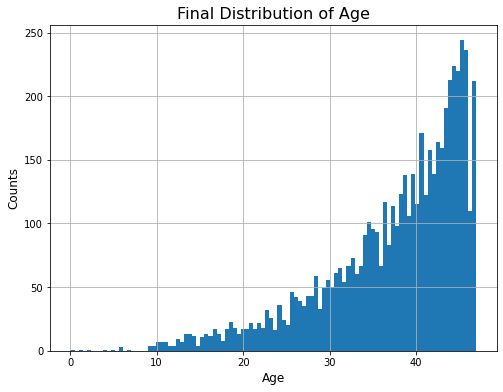

In [42]:
# Visualize the distribution of age
fig, ax = plt.subplots(figsize=(8,6));
cust_age['age'].hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

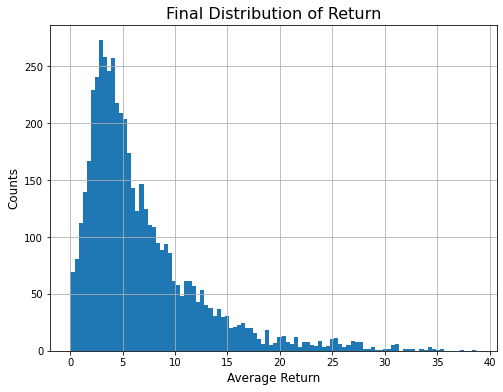

In [43]:
# Visualize the distribution of return
fig, ax = plt.subplots(figsize=(8,6));
cust_agg_group['return'].hist(bins=100,ax=ax)
ax.set_title("Final Distribution of Return", fontsize=16)
ax.set_xlabel("Average Return", fontsize=12);
ax.set_ylabel("Counts", fontsize=12);

# RFM-AR Segmentation

In [44]:
# Make a new variable contain of cust_agg data
rfm_scores = cust_agg

In [45]:
# Show rfm_scores table
rfm_scores

,customer_id,transaction_date_max,frequency,monetary,recency,transaction_date_min,age,return,nrow
1,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,0.032855,2
2,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,12.911969,3
3,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,4.008296,4
4,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,6.373848,5
6,266784,2012-09-09,3,5694.065,26.743876,2012-04-12,31.672108,4.369700,2
...,...,...,...,...,...,...,...,...,...
22976,275261,2013-06-27,5,6968.130,17.183104,2011-05-10,42.777059,1.577034,5
22978,275262,2012-02-29,2,5078.580,33.084868,2011-08-13,39.655845,6.570977,2
22980,275264,2011-08-10,2,3815.565,39.754410,2011-05-08,42.842769,3.088359,2
22982,275265,2013-03-04,3,3252.015,20.961416,2011-12-17,35.516130,0.295694,2


In [46]:
# Labelling RFM-AR based on quantile
rfm_scores['R'] = pd.qcut(rfm_scores['recency'], 3, labels=[3, 2, 1])
rfm_scores['F'] = pd.qcut(rfm_scores['frequency'], 3, labels=[1, 2, 3])
rfm_scores['M'] = pd.qcut(rfm_scores['monetary'], 3, labels=[1, 2, 3])
rfm_scores['A'] = pd.qcut(rfm_scores['age'], 3, labels=[1, 2, 3])
rfm_scores['Re'] = pd.qcut(rfm_scores['return'].rank(method='first'), 3, labels=[3, 2, 1])
rfm_scores.head()

,customer_id,transaction_date_max,frequency,monetary,recency,transaction_date_min,age,return,nrow,R,F,M,A,Re
1,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,0.032855,2,2,2,2,1,3
2,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,12.911969,3,2,2,2,1,1
3,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,4.008296,4,2,2,2,1,2
4,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,6.373848,5,2,2,2,1,2
6,266784,2012-09-09,3,5694.065,26.743876,2012-04-12,31.672108,4.369700,2,1,1,1,1,2


In [47]:
rfm_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17482 entries, 1 to 22983
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           17482 non-null  int64         
 1   transaction_date_max  17482 non-null  datetime64[ns]
 2   frequency             17482 non-null  int64         
 3   monetary              17482 non-null  float64       
 4   recency               17482 non-null  float64       
 5   transaction_date_min  17482 non-null  datetime64[ns]
 6   age                   17482 non-null  float64       
 7   return                17482 non-null  float64       
 8   nrow                  17482 non-null  int64         
 9   R                     17482 non-null  category      
 10  F                     17482 non-null  category      
 11  M                     17482 non-null  category      
 12  A                     17482 non-null  category      
 13  Re              

In [48]:
# Calculate descriptive statistics
rfm_scores[['R','frequency','monetary','recency']].groupby('R').describe().T

R                           3             2             1
frequency count   5862.000000   5809.000000   5811.000000
          mean       6.282327      5.682389      4.799862
          std        2.190226      2.017870      1.834187
          min        2.000000      2.000000      2.000000
          25%        5.000000      4.000000      3.000000
          50%        6.000000      5.000000      5.000000
          75%        8.000000      7.000000      6.000000
          max       13.000000     12.000000     12.000000
monetary  count   5862.000000   5809.000000   5811.000000
          mean   16473.218039  14814.443580  12722.571622
          std     8126.567026   7206.284015   7142.011558
          min      643.110000    609.960000    269.620000
          25%    10687.283750   9394.710000   7375.322500
          50%    15343.477500  14277.705000  11528.465000
          75%    20979.530000  19091.085000  16742.960000
          max    53772.615000  48425.520000  41596.620000
recency   count   5862.000000   5809.000000   5811.000000
          mean       9.053017     14.284482     23.150458
          std        3.383927      1.338401      5.352785
          min        0.000000     12.156307     16.953120
          25%        9.035093     13.141954     19.055833
          50%       10.316434     14.193310     21.717078
          75%       11.367790     15.310376     25.659664
          max       12.123452     16.920265     45.372595

In [49]:
# Change data type to integer
rfm_scores['R'] = rfm_scores['R'].astype('int')
rfm_scores['F'] = rfm_scores['F'].astype('int')
rfm_scores['M'] = rfm_scores['M'].astype('int')
rfm_scores['A'] = rfm_scores['A'].astype('int')
rfm_scores['Re'] = rfm_scores['Re'].astype('int')

In [50]:
# Make a new column contain of total value from R, F, M, A, and Re columns
rfm_scores['rfm_score'] = rfm_scores['R'] + rfm_scores['F'] + rfm_scores['M']+ rfm_scores['A']+ rfm_scores['Re']
rfm_scores['rfm_score_str'] = rfm_scores['R'].map(str) + rfm_scores['F'].map(str) + rfm_scores['M'].map(str) + rfm_scores['A'].map(str)+ rfm_scores['Re'].map(str)
rfm_scores['rfm_score_str'].unique()

array(['22213', '22211', '22212', '11112', '11113', '13331', '13333',
       '13332', '31122', '31121', '33333', '33332', '33331', '31111',
       '31112', '32312', '32313', '32311', '11111', '22222', '22221',
       '12333', '12331', '11122', '12213', '12212', '32222', '32221',
       '12121', '12122', '12123', '11131', '11133', '31131', '23333',
       '23331', '23332', '21111', '21113', '31212', '31211', '32223',
       '11121', '11123', '11221', '11222', '11132', '11232', '11233',
       '11231', '22313', '22311', '22312', '13113', '13112', '21222',
       '21223', '21221', '31132', '31133', '12332', '23321', '23322',
       '23323', '31233', '31232', '31231', '22322', '22321', '22323',
       '22223', '32233', '32231', '32232', '12233', '12232', '22123',
       '22121', '22122', '22231', '22233', '22232', '31222', '31221',
       '11223', '12321', '12323', '12322', '31213', '32211', '32212',
       '32213', '21121', '11213', '23312', '23313', '21312', '21311',
       '22331', '223

In [51]:
rfm_scores['rfm_score_str'].nunique()

241

In [52]:
rfm_scores['rfm_score'].unique()

array([10,  8,  9,  6,  7, 11, 13, 12, 15, 14,  5])

In [53]:
# Make a new column contain of segment name
label = {5:'At Risk', 6:'At Risk', 7:'Need Attention', 8:'Need Attention', 9:'Need Attention',
         10:'Need Attention', 11:'Potential Loyalist', 12:'Potential Loyalist',
         13:'Champion', 14:'Champion', 15:'Champion'}
rfm_scores['label'] = rfm_scores['rfm_score'].map(label)
rfm_scores.head()

,customer_id,transaction_date_max,frequency,monetary,recency,transaction_date_min,age,return,nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label
1,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,0.032855,2,2,2,2,1,3,10,22213,Need Attention
2,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,12.911969,3,2,2,2,1,1,8,22211,Need Attention
3,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,4.008296,4,2,2,2,1,2,9,22212,Need Attention
4,266783,2013-09-02,5,14791.530,14.981827,2011-09-23,38.308795,6.373848,5,2,2,2,1,2,9,22212,Need Attention
6,266784,2012-09-09,3,5694.065,26.743876,2012-04-12,31.672108,4.369700,2,1,1,1,1,2,6,11112,At Risk


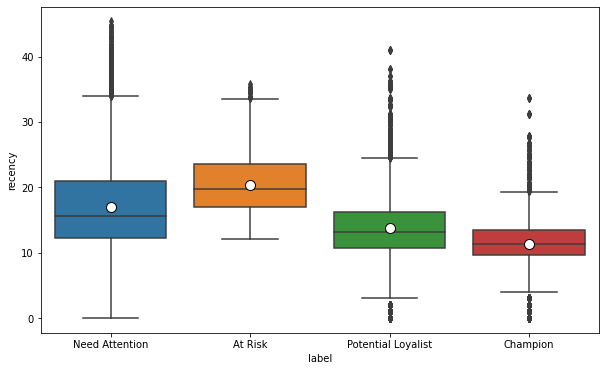

In [54]:
# Visualize the boxplot of recency
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y='recency', data=rfm_scores,showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

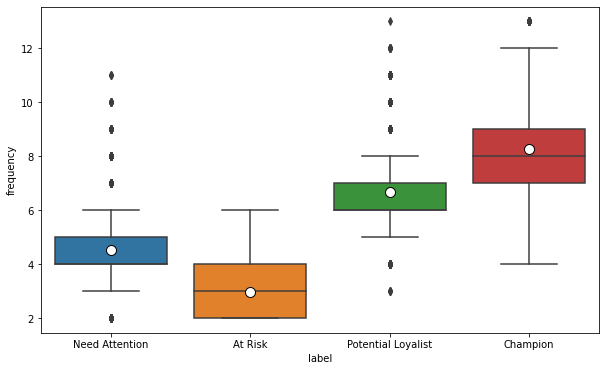

In [55]:
# Visualize the boxplot of frequency
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y='frequency', data=rfm_scores,showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

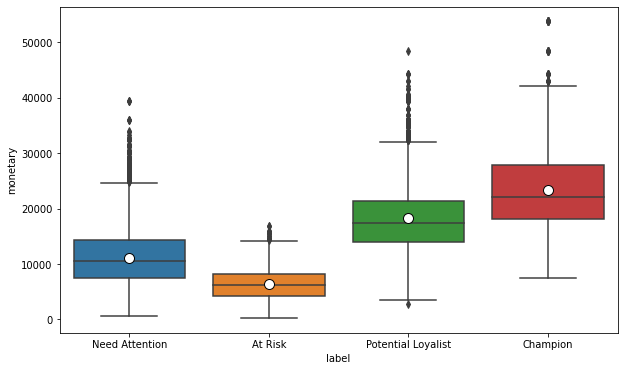

In [56]:
# Visualize the boxplot of monetary
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y='monetary', data=rfm_scores,showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

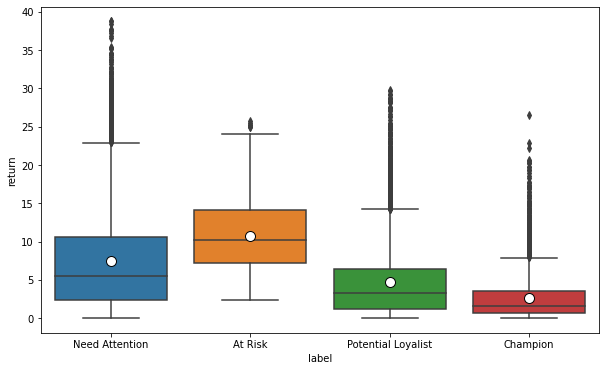

In [57]:
# Visualize the boxplot of return
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y='return', data=rfm_scores,showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

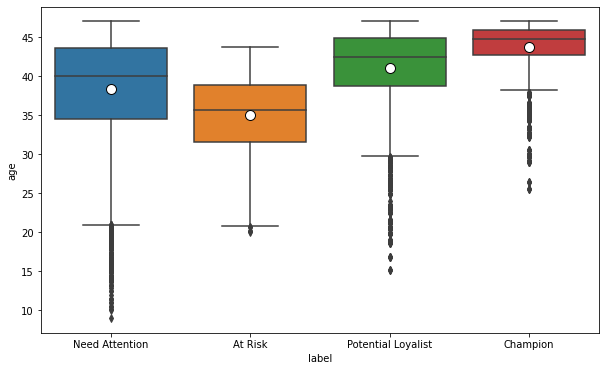

In [58]:
# Visualize the boxplot of age
fig, ax = plt.subplots(figsize=(10,6));
sns.boxplot(x='label', y='age', data=rfm_scores,showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.show()

In [59]:
# Save rfm_scores data to drive
rfm_scores.to_csv('/content/drive/MyDrive/IYKRA/#8 Create Targeted Campaign with RFM and Promotion Recommendation/Practice Case/rfm score.csv', index=False)
rfm_scores = pd.read_csv('/content/drive/MyDrive/IYKRA/#8 Create Targeted Campaign with RFM and Promotion Recommendation/Practice Case/rfm score.csv')

# **Questions**

1. Di bulan ke berapa transaksi paling banyak per cluster
2. 10 produk yang paling laris di setiap cluster
3. Di negara mana yang menjadi dominansi tempat tinggal customer per cluster
4. 5 Produk terbawah per cluster dan secara umum?

In [60]:
# Merge df and rfm_scores data
df_rfm = pd.merge(df, rfm_scores, left_on='customer_id', right_on='customer_id', how='left')
df_rfm.isnull().sum()

transaction_id            0
customer_id               0
transaction_date          0
subcategory_code          0
category_code             0
quantity                  0
rate                      0
tax                       0
total_amount              0
store_type                0
birth                     0
gender                    0
city_code                 0
transaction_date_max    467
frequency               467
monetary                467
recency                 467
transaction_date_min    467
age                     467
return                  467
nrow                    467
R                       467
F                       467
M                       467
A                       467
Re                      467
rfm_score               467
rfm_score_str           467
label                   467
dtype: int64

In [61]:
# Drop null data
df_rfm.dropna(inplace=True)
df_rfm.isnull().sum()

transaction_id          0
customer_id             0
transaction_date        0
subcategory_code        0
category_code           0
quantity                0
rate                    0
tax                     0
total_amount            0
store_type              0
birth                   0
gender                  0
city_code               0
transaction_date_max    0
frequency               0
monetary                0
recency                 0
transaction_date_min    0
age                     0
return                  0
nrow                    0
R                       0
F                       0
M                       0
A                       0
Re                      0
rfm_score               0
rfm_score_str           0
label                   0
dtype: int64

## 1. Di bulan ke berapa transaksi paling banyak per cluster

In [62]:
# Make a new column contain of month
df_rfm['month'] = pd.to_datetime(df['transaction_date']).dt.month
# Visualise the data to answer the question
df_rfm.groupby(['label','month'])['transaction_id'].count()

label               month
At Risk             1.0       56
                    2.0       42
                    3.0       87
                    4.0       48
                    5.0       48
                    6.0       48
                    7.0       36
                    8.0       37
                    9.0       48
                    10.0      56
                    11.0      38
                    12.0      28
Champion            1.0      536
                    2.0      519
                    3.0      569
                    4.0      521
                    5.0      475
                    6.0      446
                    7.0      563
                    8.0      621
                    9.0      467
                    10.0     525
                    11.0     501
                    12.0     512
Need Attention      1.0      838
                    2.0      736
                    3.0      674
                    4.0      663
                    5.0      731
                 

## 2. 10 produk yang paling laris di setiap cluster

In [63]:
product_rating = df_rfm[['customer_id','subcategory_code','quantity']].groupby(['customer_id','subcategory_code']).agg({'quantity':'sum','subcategory_code':[('NTrans','count')]}).reset_index()
product_rating.columns=['customer_id','subcategory_code','quantity','NTrans']
product_rating

,customer_id,subcategory_code,quantity,NTrans
0,266783,1,32,8
1,266783,4,16,8
2,266783,10,8,4
3,266784,4,4,2
4,266784,7,10,2
...,...,...,...,...
16814,275264,10,5,1
16815,275264,12,4,1
16816,275265,1,2,2
16817,275265,2,6,2


In [64]:
rating = []
q1 = product_rating['quantity'].quantile(.25)
q2 = product_rating['quantity'].quantile(.55)
q3 = product_rating['quantity'].quantile(.75)

for q in product_rating['quantity']:
    if q > q3 :
        rating.append(4)
    elif q > q2 :
        rating.append(3)
    elif q > q1:
        rating.append(2)
    else:
        rating.append(1)

product_rating['rating'] = rating

In [65]:
product_rating['rating'].unique()

array([4, 3, 2, 1])

In [66]:
df_rfm = pd.merge(df_rfm, product_rating, on =['customer_id','subcategory_code'], how='left')
df_rfm.shape

(97728, 33)

In [67]:
# Champion
df_rfm[df_rfm['label']=="Champion"].groupby(['category_code']).agg({'rating':'mean','quantity_y':'mean'}).sort_values(by=['rating','quantity_y'], ascending=False)[:10].reset_index()

,category_code,rating,quantity_y
0,1,3.651574,56.585426
1,4,3.634314,53.585784
2,2,3.629066,55.938119
3,6,3.556623,48.202700
4,5,3.515123,46.609136
5,3,3.510244,47.551220


In [68]:
top_champ = df_rfm[df_rfm['label']=="Champion"].groupby(['category_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=False)[:10].reset_index()['category_code']
top_champ

0    1
1    4
2    2
3    6
4    5
5    3
Name: category_code, dtype: int64

In [69]:
top_potential = df_rfm[df_rfm['label']=="Potential Loyalist"].groupby(['category_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=False)[:10].reset_index()['category_code']
top_potential

0    4
1    1
2    2
3    6
4    5
5    3
Name: category_code, dtype: int64

In [70]:
top_attention = df_rfm[df_rfm['label']=="Need Attention"].groupby(['category_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=False)[:10].reset_index()['category_code']
top_attention

0    1
1    2
2    4
3    6
4    5
5    3
Name: category_code, dtype: int64

In [71]:
top_risk = df_rfm[df_rfm['label']=="At Risk"].groupby(['category_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=False)[:10].reset_index()['category_code']
top_risk

0    4
1    6
2    2
3    1
4    5
5    3
Name: category_code, dtype: int64

## 3. Distribution of country per cluster



In [72]:
# Champion 
df_rfm[df_rfm['label']=="Champion"].groupby(['city_code'])['customer_id'].count().sort_values(ascending=False)[:10].reset_index()

,city_code,customer_id
0,7.0,2622
1,5.0,2554
2,3.0,2484
3,8.0,2473
4,6.0,2377
5,10.0,2289


In [73]:
# Potential Loyalist
df_rfm[df_rfm['label']=="Potential Loyalist"].groupby(['city_code'])['customer_id'].count().sort_values(ascending=False)[:10].reset_index()

,city_code,customer_id
0,3.0,3565
1,4.0,3416
2,8.0,3302
3,10.0,3268


In [74]:
# Need Attention
df_rfm[df_rfm['label']=="Need Attention"].groupby(['city_code'])['customer_id'].count().sort_values(ascending=False)[:10].reset_index()

,city_code,customer_id
0,4.0,4247
1,7.0,4218
2,5.0,4101
3,10.0,4025


In [75]:
# At Risk
df_rfm[df_rfm['label']=="At Risk"].groupby(['city_code'])['customer_id'].count().sort_values(ascending=False)[:10].reset_index()

,city_code,customer_id
0,3.0,452
1,5.0,444
2,4.0,409
3,6.0,391
4,2.0,369
5,7.0,361
6,1.0,355
7,8.0,337
8,10.0,322


## 4. Produk sub category terbawah per cluster 

In [76]:
# Champion
bottom_champ = df_rfm[df_rfm['label']=="Champion"].groupby(['category_code','subcategory_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=True)[:5].reset_index()[['category_code', 'subcategory_code']]
bottom_champ

,category_code,subcategory_code
0,5,6
1,3,9
2,3,8
3,3,5
4,6,2


In [77]:
# Potential Loyalist
bottom_potential = df_rfm[df_rfm['label']=="Potential Loyalist"].groupby(['category_code','subcategory_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=True)[:5].reset_index()[['category_code','subcategory_code']]
bottom_potential

,category_code,subcategory_code
0,5,6
1,6,2
2,3,9
3,5,7
4,3,5


In [78]:
# Need Attention
bottom_attention = df_rfm[df_rfm['label']=="Need Attention"].groupby(['subcategory_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=True)[:5].reset_index()['subcategory_code']
bottom_attention

0    8
1    9
2    7
3    5
4    6
Name: subcategory_code, dtype: int64

In [79]:
# At Risk
bottom_risk = df_rfm[df_rfm['label']=="At Risk"].groupby(['subcategory_code']).agg({'rating':'mean','quantity_y':'mean','rate':'mean'}).sort_values(by=['rating','quantity_y'], ascending=True)[:5].reset_index()['subcategory_code']
bottom_risk

0    8
1    5
2    6
3    1
4    3
Name: subcategory_code, dtype: int64

In [80]:
# Make a new column to get the age of customers
max_date_df_rfm = df_rfm['transaction_date'].max()
df_rfm['umur'] = (max_date_df_rfm  - df_rfm['birth']).astype('timedelta64[Y]').astype('int')
df_rfm.head()

,transaction_id,customer_id,transaction_date,subcategory_code,category_code,quantity_x,rate,tax,total_amount,store_type,birth,gender,city_code,transaction_date_max,frequency,monetary,recency,transaction_date_min,age,return,nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label,month,quantity_y,NTrans,rating,umur
0,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,2014-02-28,5.0,14299.805,9.100803,2011-12-13,35.647549,15.146102,2.0,3.0,2.0,2.0,1.0,1.0,9.0,32211.0,Need Attention,2.0,40,8,4,33
1,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,2014-02-28,5.0,14299.805,9.100803,2011-12-13,35.647549,5.979589,3.0,3.0,2.0,2.0,1.0,2.0,10.0,32212.0,Need Attention,2.0,40,8,4,33
2,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,2014-02-28,5.0,14299.805,9.100803,2011-12-13,35.647549,5.158217,4.0,3.0,2.0,2.0,1.0,2.0,10.0,32212.0,Need Attention,2.0,40,8,4,33
3,80712190438,270351,2014-02-28,1,1,5,772,405.300,4265.300,e-Shop,1981-09-26,M,5.0,2014-02-28,5.0,14299.805,9.100803,2011-12-13,35.647549,0.262839,5.0,3.0,2.0,2.0,1.0,3.0,11.0,32213.0,Potential Loyalist,2.0,40,8,4,33
4,29258453508,270384,2014-02-27,5,3,5,1497,785.925,8270.925,e-Shop,1973-11-05,F,8.0,2014-02-27,10.0,28781.935,9.133658,2011-02-17,45.471160,0.427113,2.0,3.0,3.0,3.0,3.0,3.0,15.0,33333.0,Champion,2.0,80,16,4,41


In [81]:
# Make a new variable to get unique customer_id values
distict = df_rfm.drop_duplicates(subset=['customer_id'], keep='last')
distict

,transaction_id,customer_id,transaction_date,subcategory_code,category_code,quantity_x,rate,tax,total_amount,store_type,birth,gender,city_code,transaction_date_max,frequency,monetary,recency,transaction_date_min,age,return,nrow,R,F,M,A,Re,rfm_score,rfm_score_str,label,month,quantity_y,NTrans,rating,umur
1440,73384846911,273877,2014-03-02,10,3,3,97,30.555,321.555,Flagship store,1977-12-01,M,5.0,2014-04-02,2.0,643.110,8.016592,2014-03-02,9.035093,1.018501,2.0,3.0,1.0,1.0,1.0,3.0,9.0,31113.0,Need Attention,12.0,6,2,1,37
1786,7338933735,271474,2014-01-29,6,5,4,173,72.660,764.660,TeleShop,1974-02-12,M,8.0,2014-02-02,2.0,1529.320,9.955030,2014-01-29,10.086449,0.131420,2.0,3.0,1.0,1.0,1.0,3.0,9.0,31113.0,Need Attention,11.0,8,2,2,40
2127,38807835117,269786,2014-01-26,7,5,5,245,128.625,1353.625,Flagship store,1975-10-29,F,9.0,2014-03-02,2.0,2707.250,9.035093,2014-01-26,10.185014,1.149921,2.0,3.0,1.0,1.0,1.0,3.0,9.0,31113.0,Need Attention,8.0,10,2,2,39
2985,12512192994,268020,2014-01-17,11,6,3,558,175.770,1849.770,Flagship store,1985-07-22,F,7.0,2014-01-22,2.0,3699.540,10.316434,2014-01-17,10.480708,0.164274,2.0,3.0,1.0,1.0,1.0,3.0,9.0,31113.0,Need Attention,9.0,6,2,1,29
3283,10870253111,270265,2014-01-14,1,1,2,308,64.680,680.680,TeleShop,1988-02-22,F,5.0,2014-01-19,2.0,1361.360,10.414998,2014-01-14,10.579273,0.164274,2.0,3.0,1.0,1.0,1.0,3.0,9.0,31113.0,Need Attention,9.0,4,2,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97711,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,1972-02-21,M,7.0,2013-05-01,5.0,6290.765,19.055833,2011-01-25,46.226822,6.406702,5.0,1.0,2.0,1.0,3.0,2.0,9.0,12132.0,Need Attention,NaN,4,4,1,42
97712,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,1984-04-27,M,9.0,2012-01-12,2.0,2975.765,34.661903,2011-01-25,46.226822,11.564919,2.0,1.0,1.0,1.0,3.0,1.0,7.0,11131.0,Need Attention,NaN,1,1,1,30
97716,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,1976-06-20,M,8.0,2013-08-17,5.0,12236.770,15.507505,2011-01-25,46.226822,2.464116,5.0,2.0,2.0,2.0,3.0,2.0,11.0,22232.0,Potential Loyalist,NaN,16,4,3,38
97720,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,2012-10-04,5.0,19842.485,25.922504,2011-01-25,46.226822,2.924085,5.0,1.0,2.0,3.0,3.0,2.0,11.0,12332.0,Potential Loyalist,NaN,24,8,3,44


In [82]:
# Calculate descriptive statistics to know the characteristic of each segment
pd.pivot_table(df_rfm, values = ['umur', 'total_amount', 'frequency', 'monetary', 'recency', 'age', 'rfm_score'],
               index = "label", aggfunc = [np.mean, np.max, np.min, np.median]).reset_index()

label       mean            ...    median                  
                             age frequency  ... rfm_score total_amount umur
0             At Risk  35.285970  3.174565  ...       6.0     1607.775   32
1            Champion  43.765553  8.608896  ...      13.0     2375.750   33
2      Need Attention  38.610209  4.884062  ...       9.0     1907.230   33
3  Potential Loyalist  40.996239  6.978691  ...      11.0     2243.150   33

[4 rows x 29 columns]

In [83]:
# Visualize the proportion of segment 
count = distict['label'].value_counts()
px.pie(distict, values=count, names = count.index, title='Proportion of Segment', color_discrete_sequence = px.colors.sequential.RdBu)

In [84]:
# Save the data to drive
df_rfm.to_csv('/content/drive/MyDrive/IYKRA/#8 Create Targeted Campaign with RFM and Promotion Recommendation/Practice Case/data clean.csv', index=False)